<a href="https://colab.research.google.com/github/luizfernando120/Projeto-teste/blob/main/C%C3%B3pia_de_Projeto_07_Abril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas


In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.3 MB/s eta 0:00:00


## **Numpy**
### numpy é uma biblioteca Python que fornece um objeto de matriz multidimensional,vários objetos derivados (como matrizes e matrizes mascaradas) e uma variedadede rotinas para operações rápidas em matrizes. (**CAPARROZ**, 2023)
## **Pandas**
### pandas é uma biblioteca de software livre para a linguagem de programação,Python, utilizada principalmente para manipulação e análise de dados;Ele fornece uma estrutura de dados flexível e de alto desempenho, chamada DataFrame, que é capaz de lidar com grandes conjuntos de dados e realizar operações comuns de análise de dados, como limpeza, filtragem, agrupamento, agregação, transformação e visualização. (**CAPARROZ**, 2023)
## **Ploty Express**
### ploty é uma biblioteca de visualização de dados para Python, Javascript e R. Eles tem uma série de produtos, desde para criação de dashboards até clientes SQL. Plotly permite que você utilize seus gráficos em aplicações e, claro, Jupyter Notebooks. (**VASCONCELLOS**, 2018)


#Importação dos dados

In [3]:
df = pd.read_csv ('https://raw.githubusercontent.com/luizfernando120/Projeto_Governanca_TI_2023/main/obitos_publico.csv', sep = ';')

# Dados referentes aos acidentes fatais de trânsito no estado de São Paulo

In [4]:
df

,Ano do BO (RDO),Data do Acidente,Tipo do veiculo da vitima,Tipo de vitima,Tipo de acidente,Sexo,Idade da vitima
0,2023,28/02/2023,MOTOCICLETA,CONDUTOR,NAO DISPONIVEL,MASCULINO,21
1,2023,28/02/2023,MOTOCICLETA,CONDUTOR,COLISAO,MASCULINO,55
2,2023,28/02/2023,PEDESTRE,PEDESTRE,ATROPELAMENTO,FEMININO,89
3,2023,28/02/2023,NAO DISPONIVEL,NAO DISPONIVEL,ATROPELAMENTO,FEMININO,78
4,2023,05/02/2023,CAMINHAO,NAO DISPONIVEL,COLISAO,MASCULINO,35
...,...,...,...,...,...,...,...
42826,2014,27/07/2014,AUTOMOVEL,PASSAGEIRO,COLISAO,FEMININO,42
42827,2015,01/01/2015,BICICLETA,CONDUTOR,COLISAO,MASCULINO,42
42828,2015,01/01/2015,BICICLETA,CONDUTOR,CHOQUE,MASCULINO,44
42829,2015,01/01/2015,PEDESTRE,PEDESTRE,ATROPELAMENTO,MASCULINO,66


#Ocorrências agrupadas por sexo

In [5]:
quantidade_tipos_sexo = df['Sexo'].value_counts()

In [6]:
quantidade_tipos_sexo

MASCULINO         34801
FEMININO           7563
NAO DISPONIVEL      467
Name: Sexo, dtype: int64

In [7]:
quantidade_tipos_sexo.index

Index(['MASCULINO', 'FEMININO', 'NAO DISPONIVEL'], dtype='object')

In [8]:
quantidade_tipos_sexo.values

array([34801,  7563,   467])

In [9]:
sexos = ['MASCULINO','FEMININO','NAO DISPONIVEL']
count_sexos = [34801,7563,467]

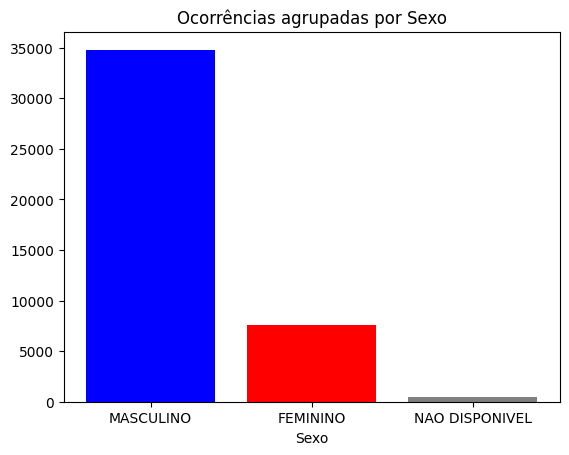

In [23]:
cores = ['blue','red','gray']
fig = plt.bar(sexos,count_sexos, align ='center', color = cores)
plt.xlabel('Sexo')
plt.title('Ocorrências agrupadas por Sexo')
plt.show()

Agrupamos as informações obtidas para visualizar melhor os números de acidentes fatais com relação ao sexo dos acidentados, como podemos analisar os homens são uma maioria gritante nesse quesito

In [ ]:
px.pie(quantidade_tipos_sexo, names=quantidade_tipos_sexo.index, values=quantidade_tipos_sexo.values,width=900,height=600)

Com base no gráfico acima, podemos observar que os *Homens* estão mais presentes dentre os acidentes fatais, representando cerca de *81,3%* dos acidentes

#MEDIA

In [ ]:
df_agrupado_pelo_sexo_media = df.groupby('Sexo').agg({ 'Idade da vitima': np.mean }).reset_index()

In [ ]:
df_agrupado_pelo_sexo_media

,Sexo,Idade da vitima
0,FEMININO,43.937062
1,MASCULINO,40.742795
2,NAO DISPONIVEL,40.278373


In [ ]:
px.bar(df_agrupado_pelo_sexo_media, y='Sexo', x='Idade da vitima', orientation='h', color='Sexo',width=1200,height=600)

 Ja no quesito Idade podemos observar no gráfico que dentre as ocorrências, a **média** de idade entre as mulheres (43,9 anos) é a maior nos acidentes fatais no estado de São Paulo

#MEDIANA

In [ ]:
df_agrupado_pelo_sexo_mediana = df.groupby('Sexo').agg({ 'Idade da vitima': np.median }).reset_index()

In [ ]:
df_agrupado_pelo_sexo_mediana

,Sexo,Idade da vitima
0,FEMININO,41.0
1,MASCULINO,38.0
2,NAO DISPONIVEL,35.0


In [ ]:
px.bar(df_agrupado_pelo_sexo_mediana, y='Sexo', x='Idade da vitima', orientation='h', color='Sexo',width=1200,height=600)

 Quando calculamos a **mediana** de idades podemos observa que o resultado é semelhante a média, sendo as mulheres (41 anos) com mais idade nos acidentes fatais no estado de São Paulo

#MODA

In [ ]:
data = pd.Series (df['Idade da vitima'])
moda = data.mode()
moda

0    21
Name: Idade da vitima, dtype: int64

#DESVIO PADRAO

In [ ]:
desvio_padrao =np.std(data)
desvio_padrao

18.520739262396788

#Ocorrências agrupadas por Tipo de Veiculo



In [ ]:
quantidade_tipos_veiculos = df['Tipo do veiculo da vitima'].value_counts()

In [ ]:
quantidade_tipos_veiculos

MOTOCICLETA       15523
AUTOMOVEL         10827
PEDESTRE           9865
BICICLETA          2807
NAO DISPONIVEL     1789
CAMINHAO           1444
ONIBUS              353
OUTROS              223
Name: Tipo do veiculo da vitima, dtype: int64

In [ ]:
quantidade_tipos_veiculos.index

Index(['MOTOCICLETA', 'AUTOMOVEL', 'PEDESTRE', 'BICICLETA', 'NAO DISPONIVEL',
       'CAMINHAO', 'ONIBUS', 'OUTROS'],
      dtype='object')

In [ ]:
quantidade_tipos_veiculos.values

array([15523, 10827,  9865,  2807,  1789,  1444,   353,   223])

In [ ]:
veiculos =['MOTOCICLETA', 'AUTOMOVEL', 'PEDESTRE', 'BICICLETA', 'NAO DISPONIVEL', 'CAMINHAO', 'ONIBUS', 'OUTROS']
quantidade = [15523, 10827,  9865,  2807,  1789,  1444,   353,   223]

In [ ]:
px.bar(x=veiculos,y=quantidade,orientation='v',color=veiculos,width=1500,height=600)

Conforme a análise do gráfico acima, concluímos que

In [ ]:
px.pie(quantidade_tipos_veiculos, names=quantidade_tipos_veiculos.index, values=quantidade_tipos_veiculos.values,width=1200,height=600)

#Ocorrências agrupadas por ano


In [ ]:
quantidade_anos = df['Ano do BO (RDO)'].value_counts()

In [ ]:
quantidade_anos

2015    6091
2016    5674
2017    5410
2022    5296
2019    5205
2018    5179
2020    4678
2021    4554
2023     704
2014      26
2013       8
2012       4
2011       1
2007       1
Name: Ano do BO (RDO), dtype: int64

In [ ]:
quantidade_anos.index

Int64Index([2015, 2016, 2017, 2022, 2019, 2018, 2020, 2021, 2023, 2014, 2013,
            2012, 2011, 2007],
           dtype='int64')

In [ ]:
quantidade_anos.values

array([6091, 5674, 5410, 5296, 5205, 5179, 4678, 4554,  704,   26,    8,
          4,    1,    1])

In [ ]:
anos =['2007', '2011', '2012', '2013',  '2014', '2015', '2016', '2017', '2018', '2019', '2020','2021' , '2022' , '2023' ]
numero = [ 1, 1, 4, 8, 26, 6091,  5674, 5410, 5179, 5205 ,4678 , 4554,  5296, 704]

In [ ]:
fig = px.scatter(x=anos,y=numero)
fig.update_traces(mode='lines+markers')



2023 estamos com esses numeros, mas lembrando que os dados foram extraidos apenas ate o mes de fevereiro